In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from scipy.stats import ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [5]:
dates = pd.read_excel('C:/Users/korab/Desktop/data science/Git Projects/DFT_Group/Dates 2.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/korab/Desktop/data science/Git Projects/DFT_Group/Dates 2.xlsx'

In [ ]:
dates

In [ ]:
sns.distplot(dates['San_Francisco'])

In [ ]:
print(dates.columns.values)

In [ ]:
datessum = dates.sum(axis=0)

In [ ]:
datessum

In [ ]:
datessum.plot(kind = 'bar')

In [ ]:
datessum.to_csv('C:/Users/korab/Desktop/data science/Git Projects/DFT_Group/DatesCountysum.csv')

# One Proportional z-test

# qn is homeless popn being affected the same way as general?

In [ ]:
count = 246
nobs = 6423
value = .5
stat, pval = proportions_ztest(count, nobs, value)
print(stat, pval)

# QN : Are the number of homeless cases affecting the general public. Are the homeless spreading COVID19 because they have no homes?

# Linear regression 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
from scipy.stats import boxcox
from statsmodels.stats.proportion import proportions_ztest

### import data

In [7]:
SF = pd.read_csv('C:/Users/korab/Desktop/data science/Git Projects/DFT_Group/covid19_homeless_impact_WR2_py.csv')

In [8]:
SF

,Unnamed: 0,date,county,rooms,rooms_occupied,trailers_requested,trailers_delivered,donated_trailers_delivered,cumulative_total_population_cases,cumulative_homeless_cases,cumulative_general_public_cases,total_population_by_percentage,homless_population_by_percentage,general_public_population_by_percentage
0,0,4/15/2020,San Francisco,1012,751,0,0,0,987,119,868,0.111739,1.216271,0.099368
1,1,4/16/2020,San Francisco,1271,748,0,0,0,1013,120,893,0.114683,1.226492,0.102230
2,2,4/17/2020,San Francisco,1271,748,0,0,0,1019,123,896,0.115362,1.257155,0.102573
3,3,4/18/2020,San Francisco,1271,710,0,0,0,1058,123,935,0.119777,1.257155,0.107038
4,4,4/19/2020,San Francisco,1273,725,0,0,0,1137,126,1011,0.128721,1.287817,0.115738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,85,7/27/2020,San Francisco,2468,1900,91,91,0,5932,244,5688,0.671569,2.493868,0.651158
86,86,7/28/2020,San Francisco,2614,1901,91,91,0,6022,246,5776,0.681758,2.514309,0.661232
87,87,7/29/2020,San Francisco,2614,1899,91,91,0,6065,246,5819,0.686626,2.514309,0.666155
88,88,7/30/2020,San Francisco,2614,1895,91,91,0,6197,246,5951,0.701570,2.514309,0.681266


## Testing assumptions

### Testing for Normality

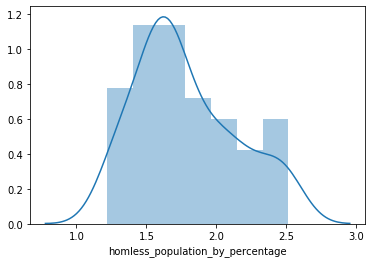

In [12]:
sns.distplot(SF['homless_population_by_percentage'])

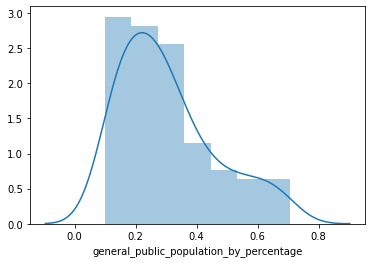

In [13]:
sns.distplot(SF['general_public_population_by_percentage'])

#### both variables are normally distributed

## Testing for Homoscedasticity

We will create the Basic Model

In [14]:
x = SF['homless_population_by_percentage']
y = SF['general_public_population_by_percentage']

In [15]:
SFmodel = sm.OLS(y,x).fit()

calculating out the residuals

In [16]:
pred_val = SFmodel.fittedvalues.copy()
true_val = SF['general_public_population_by_percentage'].values.copy()
residual = true_val - pred_val

 Graphing residuals to observe homoscedasticity

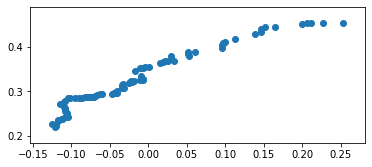

In [17]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

The graph shows some residuals and we unsure if we could have a straight line run through all the values. So we will check the graph using the Breusch Pagan test from the sms package.

In [18]:
sms.diagnostic.het_breuschpagan(residual, SF[['homless_population_by_percentage']])

(39.76675503639568, nan, 70.45615310743939, 6.72771526412301e-13)

The output shows the F value is 70, this is a big number which increases chances of being statistically significant and the pvalue of 6.7e-13 < .05 is statistically significant , so we have violated the assumption of homoscedasticity and the data in fact is heteroscedastic. We will try again using the Harvey Collier test.

In [19]:
sms.linear_harvey_collier(SFmodel)

Ttest_1sampResult(statistic=11.410715585424994, pvalue=6.677313133602373e-19)

This test also reveals a pvalue < .05, which violates assumption of homoscedasticity. So we will transform our variables so they become homoscedastic. We will apply the Box-cox transformation.

In [20]:
transformed, _ = boxcox(SF['homless_population_by_percentage'])

(array([ 5.,  7.,  5.,  4., 24., 13.,  5.,  9.,  7., 11.]),
 array([0.18553191, 0.23915384, 0.29277577, 0.3463977 , 0.40001964,
        0.45364157, 0.5072635 , 0.56088543, 0.61450736, 0.66812929,
        0.72175123]),
 <a list of 10 Patch objects>)

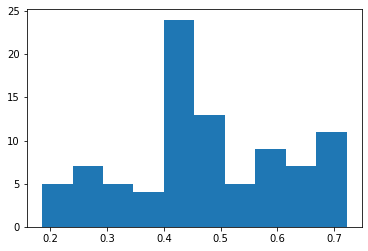

In [21]:
plt.hist(transformed)

This looks like the data has been transformed, and seems normally distributed. We will run the Homoscedasticity test to prove that.

In [23]:
x = transformed
SF1model = sm.OLS(y,x).fit()


In [24]:
pred_val = SF1model.fittedvalues.copy()
true_val = SF['general_public_population_by_percentage'].values.copy()
residual = true_val - pred_val

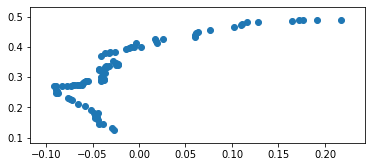

In [25]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

In [27]:
sms.linear_harvey_collier(SF1model)

Ttest_1sampResult(statistic=7.791378984019453, pvalue=1.3948527653286787e-11)

## The pvalue is still significant , in this case, we will remove the outliers in order to continue with the Analysis

### Screen for outliers

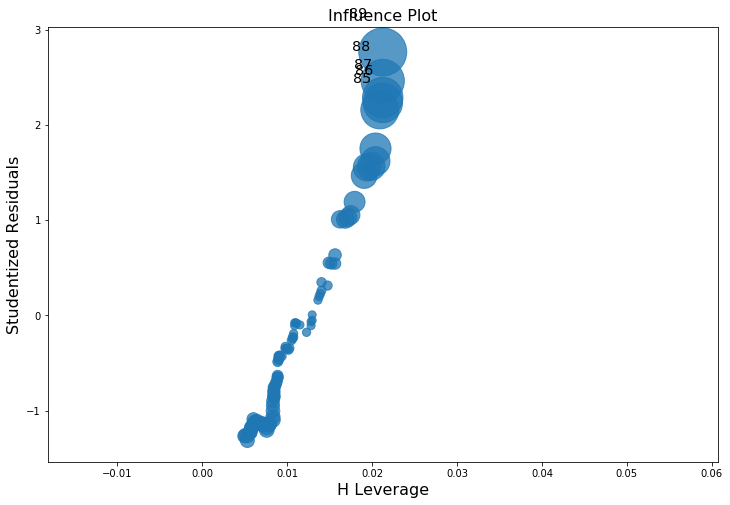

In [31]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(SFmodel, alpha = .05, ax = ax, criterion="cooks")

#### Remove the outliers row:85-89

In [32]:
SF2 = SF[:85]
SF2

,Unnamed: 0,date,county,rooms,rooms_occupied,trailers_requested,trailers_delivered,donated_trailers_delivered,cumulative_total_population_cases,cumulative_homeless_cases,cumulative_general_public_cases,total_population_by_percentage,homless_population_by_percentage,general_public_population_by_percentage
0,0,4/15/2020,San Francisco,1012,751,0,0,0,987,119,868,0.111739,1.216271,0.099368
1,1,4/16/2020,San Francisco,1271,748,0,0,0,1013,120,893,0.114683,1.226492,0.102230
2,2,4/17/2020,San Francisco,1271,748,0,0,0,1019,123,896,0.115362,1.257155,0.102573
3,3,4/18/2020,San Francisco,1271,710,0,0,0,1058,123,935,0.119777,1.257155,0.107038
4,4,4/19/2020,San Francisco,1273,725,0,0,0,1137,126,1011,0.128721,1.287817,0.115738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,80,7/20/2020,San Francisco,2407,1916,91,91,0,5202,233,4969,0.588925,2.381439,0.568847
81,81,7/21/2020,San Francisco,2407,1901,91,91,0,5305,235,5070,0.600585,2.401881,0.580410
82,82,7/22/2020,San Francisco,2468,1889,91,91,0,5363,238,5125,0.607152,2.432543,0.586706
83,83,7/23/2020,San Francisco,2468,1881,91,91,0,5459,241,5218,0.618020,2.463205,0.597353


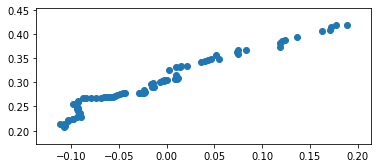

In [33]:
x = SF2['homless_population_by_percentage']
y = SF2['general_public_population_by_percentage']
SF2model = sm.OLS(y,x).fit()
pred_val = SF2model.fittedvalues.copy()
true_val = SF2['general_public_population_by_percentage'].values.copy()
residual = true_val - pred_val
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

In [34]:
sms.linear_harvey_collier(SF2model)

Ttest_1sampResult(statistic=12.187163331669842, pvalue=5.223252521250131e-20)

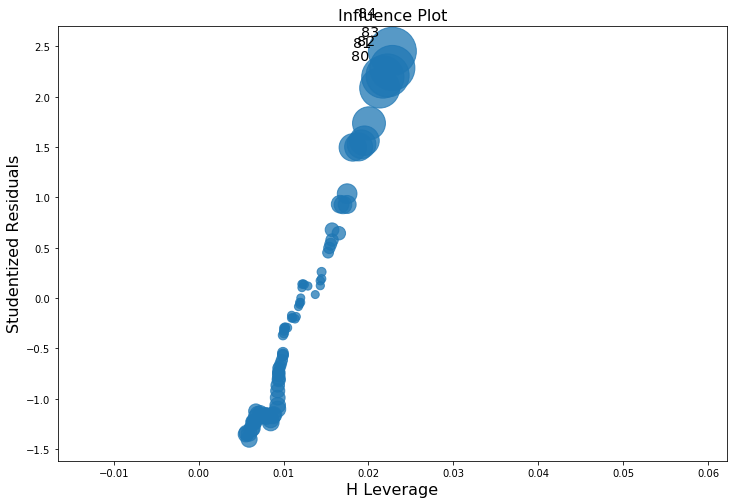

In [35]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(SF2model, alpha = .05, ax = ax, criterion="cooks")

In [41]:
SF3 = SF[:60]
SF3

,Unnamed: 0,date,county,rooms,rooms_occupied,trailers_requested,trailers_delivered,donated_trailers_delivered,cumulative_total_population_cases,cumulative_homeless_cases,cumulative_general_public_cases,total_population_by_percentage,homless_population_by_percentage,general_public_population_by_percentage
0,0,4/15/2020,San Francisco,1012,751,0,0,0,987,119,868,0.111739,1.216271,0.099368
1,1,4/16/2020,San Francisco,1271,748,0,0,0,1013,120,893,0.114683,1.226492,0.102230
2,2,4/17/2020,San Francisco,1271,748,0,0,0,1019,123,896,0.115362,1.257155,0.102573
3,3,4/18/2020,San Francisco,1271,710,0,0,0,1058,123,935,0.119777,1.257155,0.107038
4,4,4/19/2020,San Francisco,1273,725,0,0,0,1137,126,1011,0.128721,1.287817,0.115738
5,5,4/20/2020,San Francisco,1273,718,0,0,0,1157,127,1030,0.130985,1.298038,0.117914
6,6,4/21/2020,San Francisco,1273,737,0,0,0,1216,128,1088,0.137665,1.308258,0.124553
7,7,4/22/2020,San Francisco,1328,729,0,0,0,1231,129,1102,0.139363,1.318479,0.126156
8,8,4/23/2020,San Francisco,1328,809,91,59,0,1233,129,1104,0.139589,1.318479,0.126385
9,9,4/24/2020,San Francisco,1434,864,91,91,0,1302,131,1171,0.147401,1.338921,0.134055


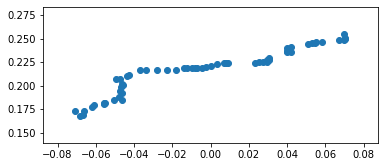

In [42]:
x = SF3['homless_population_by_percentage']
y = SF3['general_public_population_by_percentage']
SF3model = sm.OLS(y,x).fit()
pred_val = SF3model.fittedvalues.copy()
true_val = SF3['general_public_population_by_percentage'].values.copy()
residual = true_val - pred_val
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

In [43]:
sms.linear_harvey_collier(SF3model)

Ttest_1sampResult(statistic=13.426485988115932, pvalue=3.7683418460528975e-19)

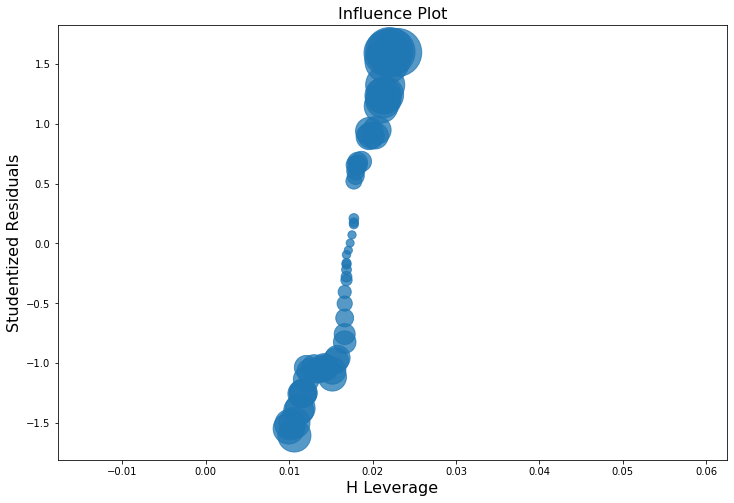

In [44]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(SF3model, alpha = .05, ax = ax, criterion="cooks")

We can observe that we have 4 outliers labeled in the graph. Lets look a a table as well to double check.

We do not have to Test for Multicollinearity because we have only one independent variable.

In [45]:
infl = SF3model.get_influence()
print(infl.summary_frame())

    dfb_homless_population_by_percentage       cooks_d  standard_resid  \
0                              -0.154963  2.346101e-02       -1.527804   
1                              -0.152837  2.286124e-02       -1.495454   
2                              -0.166236  2.691726e-02       -1.582713   
3                              -0.155328  2.362812e-02       -1.482864   
4                              -0.148091  2.158550e-02       -1.383207   
5                              -0.147383  2.139735e-02       -1.366199   
6                              -0.135483  1.817830e-02       -1.249295   
7                              -0.136081  1.834246e-02       -1.245081   
8                              -0.135506  1.819182e-02       -1.239958   
9                              -0.125326  1.563072e-02       -1.131609   
10                             -0.114335  1.305682e-02       -1.034250   
11                             -0.119826  1.432402e-02       -1.066787   
12                             -0.1183

For the student_resid, we see that we have a value that over 2.5 in row 89, this means that we have an outlier problem.

In [46]:
SF3model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                           
============================================================================================================
Dep. Variable:     general_public_population_by_percentage   R-squared (uncentered):                   0.960
Model:                                                 OLS   Adj. R-squared (uncentered):              0.959
Method:                                      Least Squares   F-statistic:                              1399.
Date:                                     Wed, 26 Aug 2020   Prob (F-statistic):                    8.63e-43
Time:                                             20:23:02   Log-Likelihood:                          101.49
No. Observations:                                       60   AIC:                                     -201.0
Df Residuals:                                           59   BIC:                                     -198.9
Df Model:                                                1                                                  
Covariance Type:                                 nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
homless_population_by_percentage     0.1379      0.004     37.398      0.000       0.131       0.145
==============================================================================
Omnibus:                       27.151   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                4.774
Skew:                           0.190   Prob(JB):                       0.0919
Kurtosis:                       1.672   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The overall model is statistically significant because pvalue <.05. the homeless cases have a significant effect on the number of general public cases. When we look at R- squared and Adj. R-squared it shows that this model accounts for 92%of the variance in explaining general public cases.